<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket_sales.csv')


In [19]:
df.head()










Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28       5.0   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22       8.0  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31       7.0  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [4]:
df.set_index ('Date', inplace = True)

In [22]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               8.886215e-16     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

In [5]:
pip install --upgrade seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.1
    Uninstalling seaborn-0.12.1:
      Successfully uninstalled seaborn-0.12.1

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


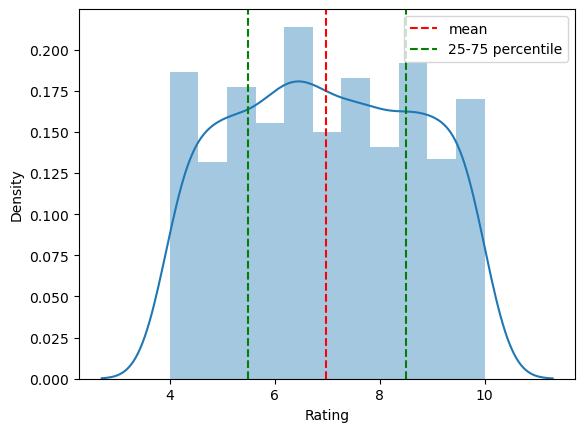

In [18]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c = 'red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75 percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()

array([[<AxesSubplot: title={'center': 'Unit price'}>,
        <AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'Tax 5%'}>],
       [<AxesSubplot: title={'center': 'Total'}>,
        <AxesSubplot: title={'center': 'cogs'}>,
        <AxesSubplot: title={'center': 'gross margin percentage'}>],
       [<AxesSubplot: title={'center': 'gross income'}>,
        <AxesSubplot: title={'center': 'Rating'}>, <AxesSubplot: >]],
      dtype=object)

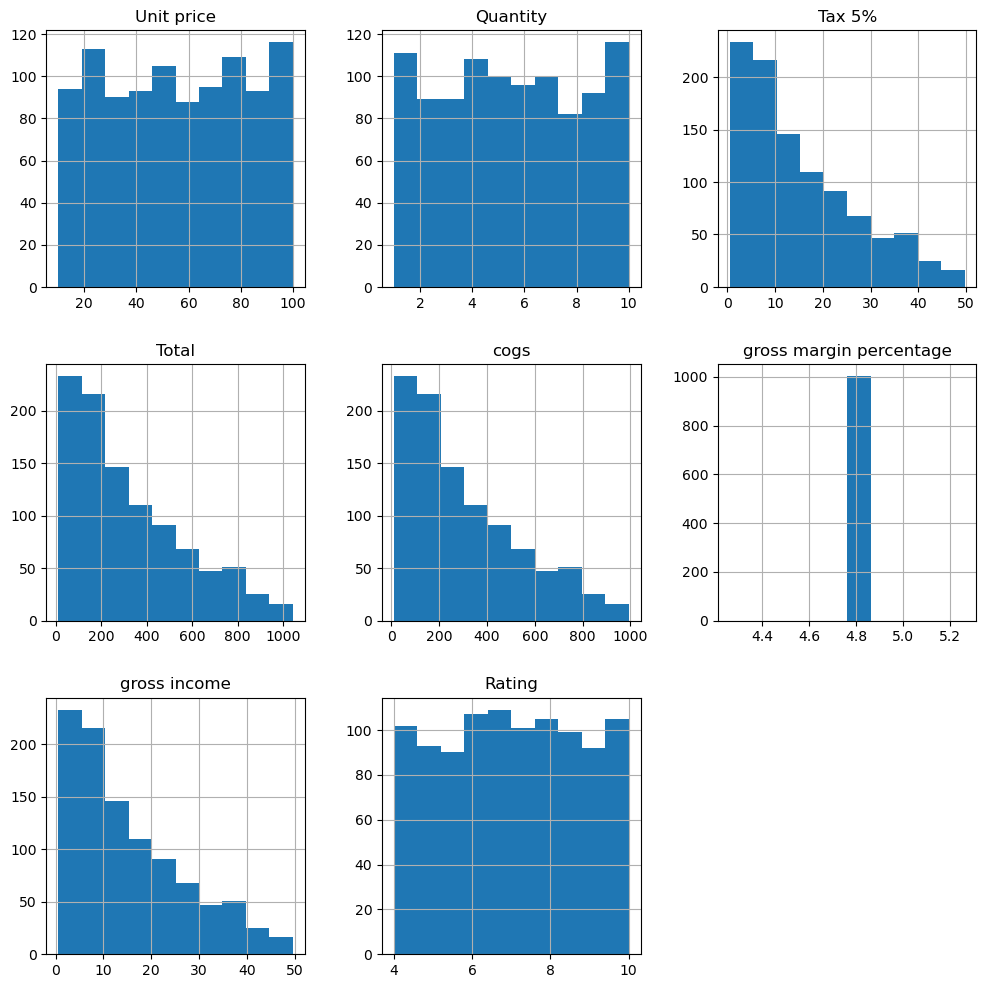

In [13]:
df.hist(figsize =(12,12))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot: xlabel='Branch', ylabel='count'>

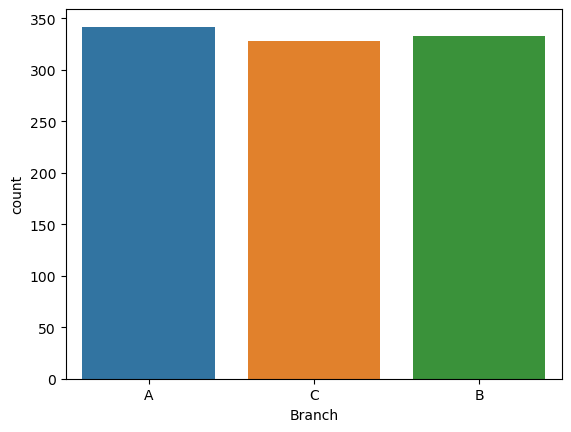

In [15]:
sns.countplot(x='Branch', data=df)

In [16]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

### Task 3: Bivariate Analysis

**Question 3.1:** Is there a relationship between gross income and customer ratings?

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

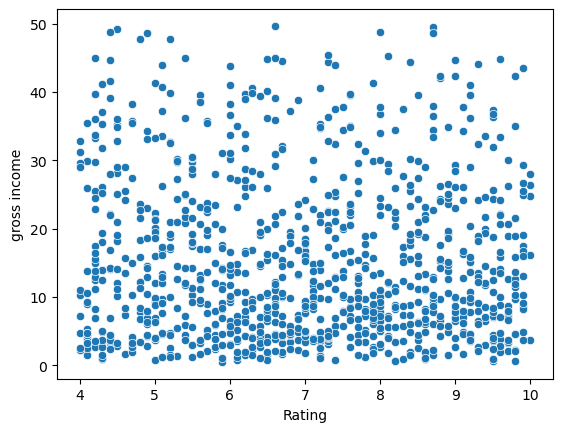

In [6]:
sns.scatterplot(data=df, x='Rating', y='gross income')

<AxesSubplot: xlabel='Rating', ylabel='gross income'>

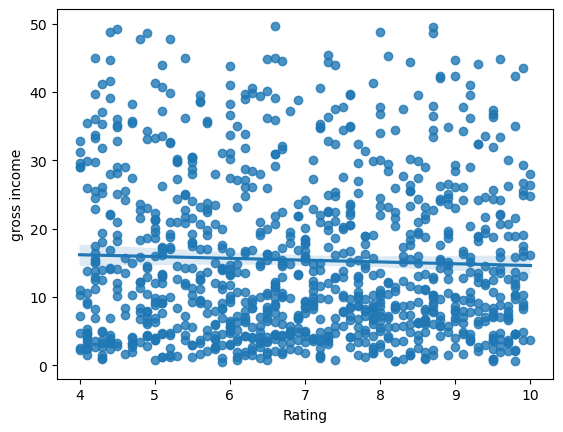

In [7]:
sns.regplot(data=df, x='Rating', y='gross income')

**Question 3.2:** Is there a relationship between gross income and Branch?

<AxesSubplot: xlabel='Branch', ylabel='gross income'>

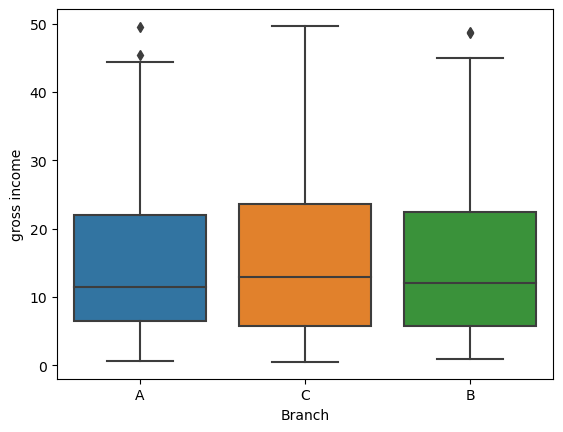

In [10]:
sns.boxplot(data=df, x='Branch', y='gross income')

**Question 4:** Is there a noticeable time trend in gross income?

In [6]:
pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.0 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: xlabel='Date', ylabel='gross income'>

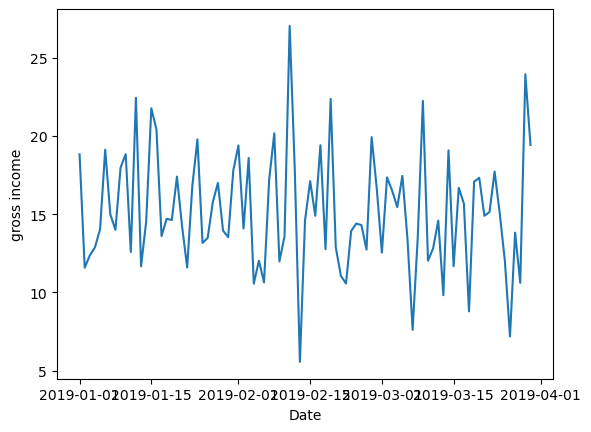

In [13]:
daily = df.resample('D').mean(numeric_only=True)   # 'W' for weekly, 'M' for monthly
sns.lineplot(x=daily.index, y=daily['gross income'])

### Task 4: Dealing With Duplicate Rows and Missing Values

In [16]:
df.duplicated().sum()

3

In [7]:
df[df.duplicated()== True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [8]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [8]:
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.078764
Gender                     0.000000
Product line               0.042871
Unit price                 0.006979
Quantity                   0.019940
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

<AxesSubplot: ylabel='Date'>

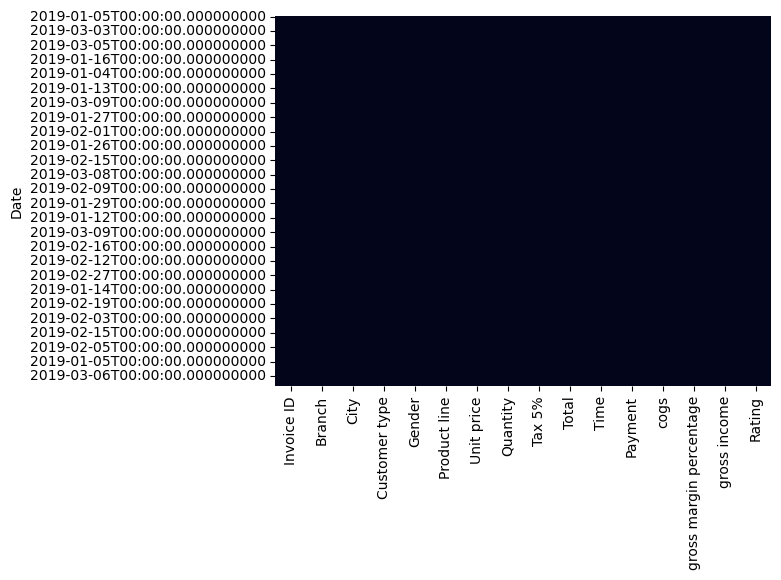

In [20]:
sns.heatmap(df.isnull(),cbar =False)

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [18]:
df.mode().iloc[0]


Invoice ID                         452-04-8808
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.764568
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                   Cash
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [10]:
df.fillna(df.mode().iloc[0], inplace=True)

In [22]:
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [15]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][-1],2)

1.0

In [19]:
np.round(df.corr(numeric_only=True),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<AxesSubplot: >

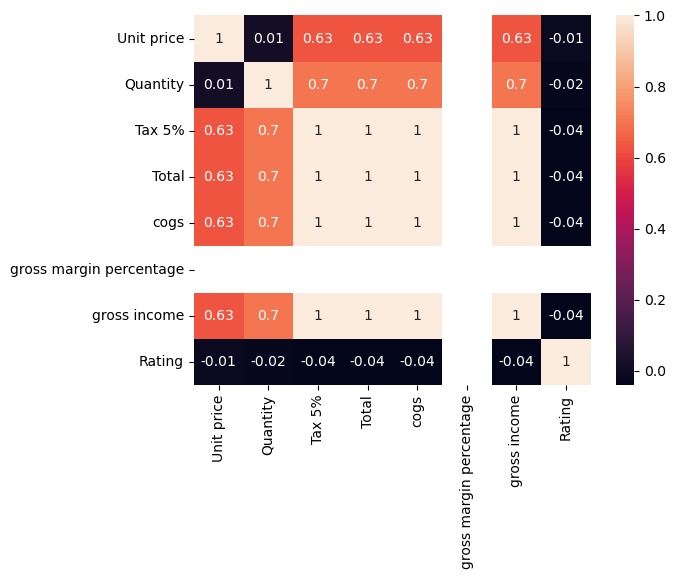

In [24]:
sns.heatmap(np.round(df.corr(numeric_only=True),2),annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/